In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

path ='s3_files/paris' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

In [2]:
frame.head()

,accommodates,bathrooms,bedrooms,borough,city,country,host_id,last_modified,latitude,location,...,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type,survey_id
0,4,NaN,2.0,NaN,NaN,NaN,32318670,2016-05-28 15:02:36.461396,48.890179,NaN,...,14.0,NaN,Epinettes,NaN,183.0,NaN,0,11387548,Entire home/apt,NaN
1,6,NaN,2.0,NaN,NaN,NaN,15373479,2016-05-28 15:01:08.142988,48.884428,NaN,...,4.0,NaN,Clignancourt,4.5,201.0,NaN,7,3016646,Entire home/apt,NaN
2,5,NaN,2.0,NaN,NaN,NaN,17234626,2016-05-28 14:59:53.744825,48.872106,NaN,...,2.0,NaN,Porte-Saint-Martin,NaN,138.0,NaN,0,9192873,Entire home/apt,NaN
3,4,NaN,2.0,NaN,NaN,NaN,16964249,2016-05-28 14:59:35.280944,48.845801,NaN,...,3.0,NaN,Grenelle,NaN,92.0,NaN,2,7111862,Entire home/apt,NaN
4,2,NaN,1.0,NaN,NaN,NaN,10229835,2016-05-28 14:52:35.797141,48.870084,NaN,...,5.0,NaN,Porte-Saint-Martin,5.0,109.0,NaN,23,1982586,Entire home/apt,NaN


In [3]:
frame.info()
paris = frame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629621 entries, 0 to 70157
Data columns (total 21 columns):
accommodates            629621 non-null int64
bathrooms               0 non-null float64
bedrooms                629145 non-null float64
borough                 0 non-null float64
city                    262698 non-null object
country                 0 non-null float64
host_id                 629621 non-null int64
last_modified           629621 non-null object
latitude                629621 non-null float64
location                262698 non-null object
longitude               629621 non-null float64
minstay                 115222 non-null float64
name                    135652 non-null object
neighborhood            629621 non-null object
overall_satisfaction    543234 non-null float64
price                   629611 non-null float64
property_type           135885 non-null object
reviews                 629621 non-null int64
room_id                 629621 non-null int64
room_ty

In [4]:
# i am going to drop null values for accommodates 
paris = paris[np.isfinite(paris['accommodates'])]
paris = paris[np.isfinite(paris['price'])]

paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629611 entries, 0 to 70157
Data columns (total 21 columns):
accommodates            629611 non-null int64
bathrooms               0 non-null float64
bedrooms                629145 non-null float64
borough                 0 non-null float64
city                    262698 non-null object
country                 0 non-null float64
host_id                 629611 non-null int64
last_modified           629611 non-null object
latitude                629611 non-null float64
location                262698 non-null object
longitude               629611 non-null float64
minstay                 115222 non-null float64
name                    135652 non-null object
neighborhood            629611 non-null object
overall_satisfaction    543230 non-null float64
price                   629611 non-null float64
property_type           135885 non-null object
reviews                 629611 non-null int64
room_id                 629611 non-null int64
room_ty

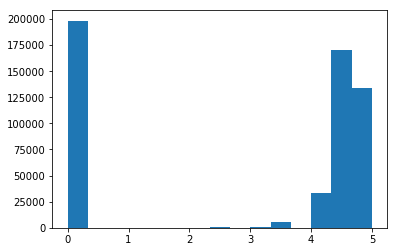

In [5]:
# i may impute overall satisfaction using the mean. first, i'll check out the distribution
rating_vals = paris[np.isfinite(paris['overall_satisfaction'])]
plt.hist(rating_vals.overall_satisfaction, bins=15)
plt.show()

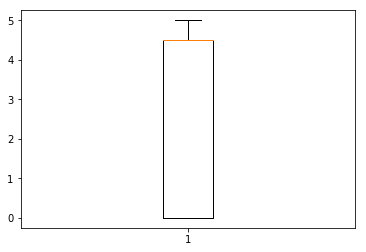

In [6]:
plt.boxplot(rating_vals.overall_satisfaction)
plt.show()

In [7]:
paris[paris['overall_satisfaction'] < 1]

,accommodates,bathrooms,bedrooms,borough,city,country,host_id,last_modified,latitude,location,...,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type,survey_id
0,1,NaN,1.0,NaN,NaN,NaN,15669323,2017-01-03 17:52:52.270369,48.890375,NaN,...,NaN,NaN,Clignancourt,0.0,92.0,NaN,0,6057158,Shared room,NaN
1,1,NaN,1.0,NaN,NaN,NaN,106863421,2017-01-03 17:52:52.268115,48.886701,NaN,...,NaN,NaN,Grandes-Carrières,0.0,92.0,NaN,0,16326530,Shared room,NaN
2,1,NaN,1.0,NaN,NaN,NaN,95001052,2017-01-03 17:52:52.265788,48.842081,NaN,...,NaN,NaN,Auteuil,0.0,93.0,NaN,1,15535840,Shared room,NaN
3,2,NaN,1.0,NaN,NaN,NaN,22530701,2017-01-03 17:52:50.752525,48.852422,NaN,...,NaN,NaN,Charonne,0.0,65.0,NaN,0,11771527,Shared room,NaN
5,2,NaN,1.0,NaN,NaN,NaN,26095542,2017-01-03 17:52:50.745691,48.861540,NaN,...,NaN,NaN,Roquette,0.0,70.0,NaN,0,5515531,Shared room,NaN
6,1,NaN,1.0,NaN,NaN,NaN,20548553,2017-01-03 17:52:48.467473,48.847386,NaN,...,NaN,NaN,Quinze-Vingts,0.0,65.0,NaN,0,16173285,Shared room,NaN
7,2,NaN,1.0,NaN,NaN,NaN,26617709,2017-01-03 17:52:48.463249,48.866520,NaN,...,NaN,NaN,Folie-Méricourt,0.0,70.0,NaN,2,5148247,Shared room,NaN
8,2,NaN,1.0,NaN,NaN,NaN,2893280,2017-01-03 17:52:48.460854,48.891803,NaN,...,NaN,NaN,Grandes-Carrières,0.0,76.0,NaN,0,4692372,Shared room,NaN
9,1,NaN,1.0,NaN,NaN,NaN,35866668,2017-01-03 17:52:48.458013,48.885582,NaN,...,NaN,NaN,Plaine-Monceau,0.0,75.0,NaN,0,9300900,Shared room,NaN
10,2,NaN,1.0,NaN,NaN,NaN,13689310,2017-01-03 17:52:48.455633,48.883500,NaN,...,NaN,NaN,Saint-Vincent-de-Paul,0.0,65.0,NaN,1,7178563,Shared room,NaN


In [8]:
# most with a rating of 0 have no reviews
paris[paris['overall_satisfaction'].isnull()]

,accommodates,bathrooms,bedrooms,borough,city,country,host_id,last_modified,latitude,location,...,minstay,name,neighborhood,overall_satisfaction,price,property_type,reviews,room_id,room_type,survey_id
0,4,NaN,2.0,NaN,NaN,NaN,32318670,2016-05-28 15:02:36.461396,48.890179,NaN,...,14.0,NaN,Epinettes,NaN,183.0,NaN,0,11387548,Entire home/apt,NaN
2,5,NaN,2.0,NaN,NaN,NaN,17234626,2016-05-28 14:59:53.744825,48.872106,NaN,...,2.0,NaN,Porte-Saint-Martin,NaN,138.0,NaN,0,9192873,Entire home/apt,NaN
3,4,NaN,2.0,NaN,NaN,NaN,16964249,2016-05-28 14:59:35.280944,48.845801,NaN,...,3.0,NaN,Grenelle,NaN,92.0,NaN,2,7111862,Entire home/apt,NaN
7,2,NaN,1.0,NaN,NaN,NaN,9886443,2016-05-28 14:45:29.701270,48.868062,NaN,...,2.0,NaN,Arts-et-Metiers,NaN,69.0,NaN,1,8577332,Private room,NaN
8,3,NaN,0.0,NaN,NaN,NaN,34996605,2016-05-28 14:41:39.421269,48.882026,NaN,...,5.0,NaN,Saint-Georges,NaN,91.0,NaN,2,6839481,Entire home/apt,NaN
10,2,NaN,1.0,NaN,NaN,NaN,33357223,2016-05-28 14:39:51.393281,48.886987,NaN,...,1.0,NaN,Goutte-dOr,NaN,69.0,NaN,0,11249047,Entire home/apt,NaN
12,4,NaN,2.0,NaN,NaN,NaN,7504411,2016-05-28 14:39:24.741264,48.866780,NaN,...,3.0,NaN,Folie-Méricourt,NaN,69.0,NaN,0,7363128,Entire home/apt,NaN
14,1,NaN,1.0,NaN,NaN,NaN,34764075,2016-05-28 14:37:34.457347,48.824788,NaN,...,3.0,NaN,Petit-Montrouge,NaN,58.0,NaN,1,7294846,Private room,NaN
15,1,NaN,0.0,NaN,NaN,NaN,7929416,2016-05-28 14:37:13.127480,48.890531,NaN,...,1.0,NaN,Grandes-Carrières,NaN,12.0,NaN,1,7297279,Entire home/apt,NaN
16,2,NaN,1.0,NaN,NaN,NaN,18241302,2016-05-28 14:36:03.643704,48.869367,NaN,...,1.0,NaN,Porte-Saint-Martin,NaN,69.0,NaN,0,3620806,Private room,NaN


In [9]:
# all rentals with 0 reviews have either a null rating or a rating of 0 
zero = paris[paris['reviews'] == 0]
zero.describe()

,accommodates,bathrooms,bedrooms,borough,country,host_id,latitude,longitude,minstay,overall_satisfaction,price,reviews,room_id,survey_id
count,172850.000000,0.0,172734.000000,0.0,0.0,1.728500e+05,172850.000000,172850.000000,35993.000000,119402.0,172850.000000,172850.0,1.728500e+05,70467.000000
mean,3.064432,NaN,1.107460,NaN,NaN,3.406647e+07,48.864330,2.343282,3.018615,0.0,121.008267,0.0,1.091089e+07,1270.016703
std,1.466659,NaN,0.835733,NaN,NaN,3.220763e+07,0.019150,0.035618,2.881955,0.0,160.002763,0.0,5.195136e+06,161.175788
min,1.000000,NaN,0.000000,NaN,NaN,2.626000e+03,48.816114,2.230293,1.000000,0.0,9.000000,0.0,3.109000e+03,1077.000000
25%,2.000000,NaN,1.000000,NaN,NaN,8.975188e+06,48.849907,2.319574,1.000000,0.0,64.000000,0.0,6.897198e+06,1146.000000
50%,2.000000,NaN,1.000000,NaN,NaN,2.371700e+07,48.865521,2.346254,2.000000,0.0,88.000000,0.0,1.179418e+07,1350.000000
75%,4.000000,NaN,1.000000,NaN,NaN,4.842834e+07,48.880840,2.371144,4.000000,0.0,131.000000,0.0,1.486241e+07,1478.000000
max,16.000000,NaN,10.000000,NaN,NaN,1.432046e+08,48.901698,2.468284,30.000000,0.0,10865.000000,0.0,2.014408e+07,1478.000000


In [10]:
# to get rid of some null values, replace all overall satisfaction #s with 0 if there are 0 reviews
paris.loc[paris['reviews'] == 0, 'overall_satisfaction'] = 0


In [11]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629611 entries, 0 to 70157
Data columns (total 21 columns):
accommodates            629611 non-null int64
bathrooms               0 non-null float64
bedrooms                629145 non-null float64
borough                 0 non-null float64
city                    262698 non-null object
country                 0 non-null float64
host_id                 629611 non-null int64
last_modified           629611 non-null object
latitude                629611 non-null float64
location                262698 non-null object
longitude               629611 non-null float64
minstay                 115222 non-null float64
name                    135652 non-null object
neighborhood            629611 non-null object
overall_satisfaction    596678 non-null float64
price                   629611 non-null float64
property_type           135885 non-null object
reviews                 629611 non-null int64
room_id                 629611 non-null int64
room_ty

Since there is such a big split in the data between 0's for ratings and ratings between 4 and 5, I don't feel comfortable imputing the rest of the rating data. There is still a ton of data to work with, so I will eliminate the remaining null values. 

In [12]:
paris = paris[np.isfinite(paris['overall_satisfaction'])]


In [13]:
# convert last updated to datetime object, drop columns I don't care about
paris['last_modified'] = pd.to_datetime(paris['last_modified'])

paris = paris.drop(['bathrooms', 'city', 'borough', 'latitude', 'country', 'location', 'longitude', 'name', 'property_type', 
                   'survey_id'], axis=1)


In [14]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596678 entries, 0 to 70157
Data columns (total 11 columns):
accommodates            596678 non-null int64
bedrooms                596281 non-null float64
host_id                 596678 non-null int64
last_modified           596678 non-null datetime64[ns]
minstay                 93925 non-null float64
neighborhood            596678 non-null object
overall_satisfaction    596678 non-null float64
price                   596678 non-null float64
reviews                 596678 non-null int64
room_id                 596678 non-null int64
room_type               596678 non-null object
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 54.6+ MB


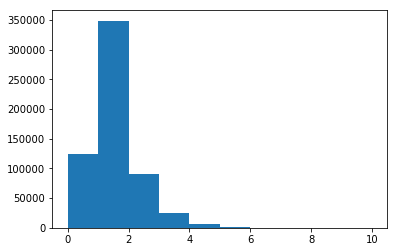

In [15]:
# i will assume if a minstay isn't included, it is 1 
paris['minstay'].fillna(1, inplace=True)

bedroom_vals = paris[np.isfinite(paris['bedrooms'])]
plt.hist(bedroom_vals.bedrooms)
plt.show()

# i feel good about imputing the mean value for missing bedrooms
paris['bedrooms'].fillna(int(paris['bedrooms'].mean()), inplace=True)


In [16]:
paris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596678 entries, 0 to 70157
Data columns (total 11 columns):
accommodates            596678 non-null int64
bedrooms                596678 non-null float64
host_id                 596678 non-null int64
last_modified           596678 non-null datetime64[ns]
minstay                 596678 non-null float64
neighborhood            596678 non-null object
overall_satisfaction    596678 non-null float64
price                   596678 non-null float64
reviews                 596678 non-null int64
room_id                 596678 non-null int64
room_type               596678 non-null object
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 54.6+ MB


In [17]:
# I want to look at change in reviews over time 
from functools import reduce

timeframe = reduce(lambda left,right: pd.merge(left,right,on=['room_id', 'host_id', 'borough', 'neighborhood',
                                                              'latitude', 'longitude', 'overall_satisfaction', 
                                                             'accommodates', 'bedrooms']), list_)



In [18]:
timeframe.columns

Index(['room_id', 'host_id', 'room_type_x', 'borough', 'neighborhood',
       'reviews_x', 'overall_satisfaction', 'accommodates', 'bedrooms',
       'price_x', 'minstay_x', 'latitude', 'longitude', 'last_modified_x',
       'room_type_y', 'reviews_y', 'price_y', 'minstay_y', 'last_modified_y',
       'room_type_x', 'reviews_x', 'price_x', 'minstay_x', 'last_modified_x',
       'room_type_y', 'reviews_y', 'price_y', 'minstay_y', 'last_modified_y',
       'room_type_x', 'reviews_x', 'price_x', 'minstay_x', 'last_modified_x',
       'room_type_y', 'reviews_y', 'price_y', 'minstay_y', 'last_modified_y',
       'survey_id_x', 'room_type_x', 'country_x', 'city_x', 'reviews_x',
       'bathrooms_x', 'price_x', 'minstay_x', 'last_modified_x', 'location_x',
       'survey_id_y', 'room_type_y', 'country_y', 'city_y', 'reviews_y',
       'bathrooms_y', 'price_y', 'minstay_y', 'last_modified_y', 'location_y',
       'survey_id_x', 'room_type_x', 'country_x', 'city_x', 'reviews_x',
       'bathroo

In [19]:
timeframe2 = timeframe[['room_id', 'accommodates', 'bedrooms', 
                       'price_x', 'price_y', 'reviews_x', 'reviews_y', 'room_type_x','neighborhood']]

In [20]:
timeframe2.ix[0]

/Users/sarahjordan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


room_id                    1982586
accommodates                     2
bedrooms                         1
price_x                        109
price_x                        103
price_x                        104
price_x                        104
price_x                        109
price_y                        109
price_y                        105
price_y                        106
price_y                        106
price_y                        114
reviews_x                       23
reviews_x                       34
reviews_x                       35
reviews_x                       35
reviews_x                       40
reviews_y                       28
reviews_y                       35
reviews_y                       35
reviews_y                       35
reviews_y                       44
room_type_x        Entire home/apt
room_type_x        Entire home/apt
room_type_x        Entire home/apt
room_type_x        Entire home/apt
room_type_x        Entire home/apt
neighborhood    Port

In [21]:
timeframe2.columns


timeframe2.columns = ['room_id', 'accommodates', 'bedrooms', 'price1', 'price2', 'price3', 'price4', 'price5',
                     'price6', 'price7', 'price8', 'price9', 'price_final', 'reviews1', 'reviews2', 'reviews3', 'reviews4', 'reviews5', 'reviews6', 'reviews7',
                     'reviews8', 'reviews9', 'reviews_final', 
                     'room_type', 'room_type1', 'room_type2', 'room_type3' ,'room_type4', 'neighborhood']

In [22]:
timeframe2['review_change'] = timeframe2.reviews_final - timeframe2.reviews1


/Users/sarahjordan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
timeframe3 = timeframe2[['room_id', 'accommodates', 'bedrooms', 'price_final', 'room_type', 'reviews1', 'review_change', 'reviews_final', 'neighborhood']]

In [24]:
timeframe3.head()

,room_id,accommodates,bedrooms,price_final,room_type,reviews1,review_change,reviews_final,neighborhood
0,1982586,2,1.0,114.0,Entire home/apt,23,21,44,Porte-Saint-Martin
1,4865481,2,1.0,66.0,Private room,9,2,11,Hôpital-Saint-Louis
2,9873808,3,0.0,88.0,Entire home/apt,5,26,31,Saint-Lambert
3,7644691,4,1.0,141.0,Entire home/apt,4,7,11,Halles
4,12087360,2,1.0,72.0,Entire home/apt,3,11,14,Belleville


In [25]:
# add arrondissement data 

neighborhoods = pd.read_csv('paris_quartier.csv')
neighborhoods = neighborhoods[['L_QU', 'C_AR']]
neighborhoods.columns = ['neighborhood', 'arrondissement']
timeframe3 = pd.merge(timeframe3, neighborhoods, how='left')
timeframe3[timeframe3['arrondissement'].isnull()]

timeframe3.head()

,room_id,accommodates,bedrooms,price_final,room_type,reviews1,review_change,reviews_final,neighborhood,arrondissement
0,1982586,2,1.0,114.0,Entire home/apt,23,21,44,Porte-Saint-Martin,10
1,4865481,2,1.0,66.0,Private room,9,2,11,Hôpital-Saint-Louis,10
2,9873808,3,0.0,88.0,Entire home/apt,5,26,31,Saint-Lambert,15
3,7644691,4,1.0,141.0,Entire home/apt,4,7,11,Halles,1
4,12087360,2,1.0,72.0,Entire home/apt,3,11,14,Belleville,20


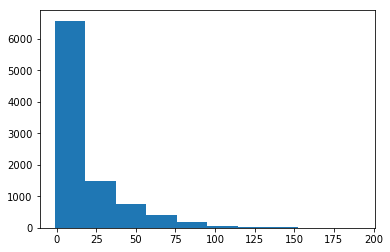

In [26]:
plt.hist(timeframe3.review_change)
plt.show()

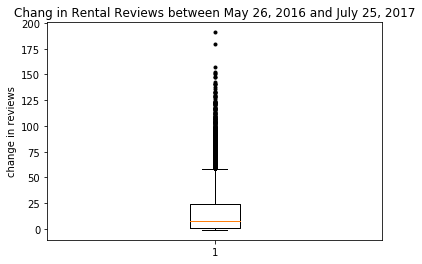

In [27]:
plt.boxplot(timeframe3.review_change, sym='k.')
plt.ylabel('change in reviews')
plt.title('Chang in Rental Reviews between May 26, 2016 and July 25, 2017')
plt.show()

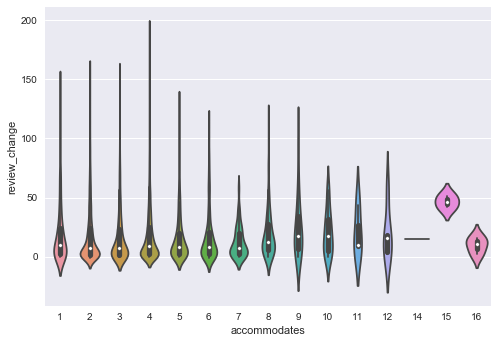

In [28]:
import seaborn as sns

sns.violinplot(timeframe3.accommodates, timeframe3.review_change)
plt.show()


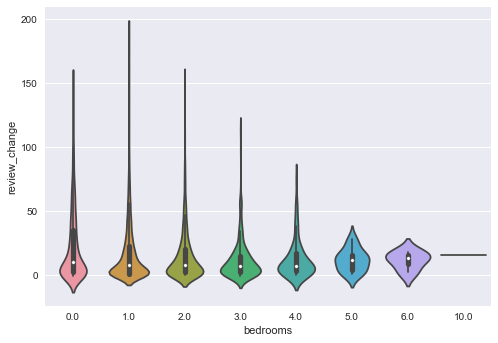

In [29]:
sns.violinplot(timeframe3.bedrooms, timeframe3.review_change)
plt.show()


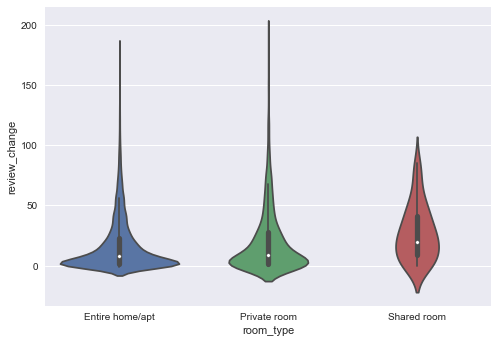

In [30]:
sns.violinplot(timeframe3.room_type, timeframe3.review_change)
plt.show()


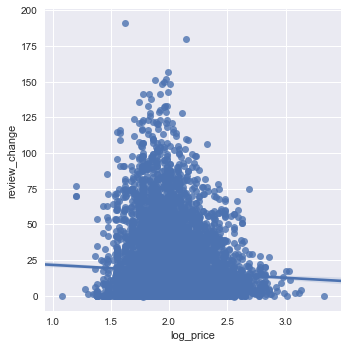

In [31]:
timeframe3['log_price'] = np.log10(timeframe3.price_final)

sns.lmplot(x='log_price', y='review_change', data=timeframe3, fit_reg=True, legend=True)
plt.show()


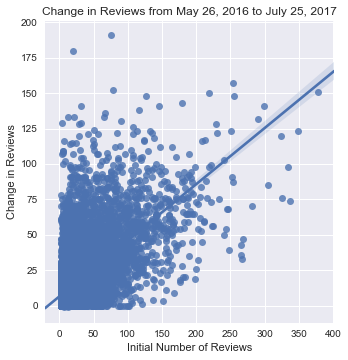

In [32]:
sns.lmplot(x='reviews1', y='review_change', data=timeframe3, fit_reg=True, legend=True)
plt.xlabel('Initial Number of Reviews')
plt.ylabel('Change in Reviews')
plt.title('Change in Reviews from May 26, 2016 to July 25, 2017')
plt.show()


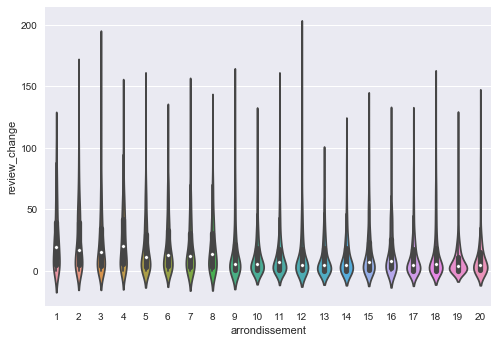

In [33]:
sns.violinplot(timeframe3.arrondissement, timeframe3.review_change)
plt.show()

In [34]:
# regression on change in reviews

X_revchange = timeframe3[['room_type', 'accommodates', 'bedrooms', 'arrondissement', 'reviews1', 'log_price']]
X_revchange = pd.get_dummies(X_revchange, columns = ['room_type', 'arrondissement'])
X_revchange = X_revchange.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

y_revchange = timeframe3['review_change']




In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


lm_revchange = sm.OLS(y_revchange, X_revchange).fit()

print(lm_revchange.summary())

/Users/sarahjordan/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:          review_change   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     620.3
Date:                Wed, 21 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:24:52   Log-Likelihood:                -40695.
No. Observations:                9521   AIC:                         8.144e+04
Df Residuals:                    9496   BIC:                         8.162e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
accommodates               1

In [36]:

timeframe3['sqrt_change'] = (timeframe3.review_change)**0.5
timeframe4 = timeframe3[np.isfinite(timeframe3['sqrt_change'])]

X_revchange = timeframe4[['room_type', 'accommodates', 'bedrooms', 'arrondissement', 'reviews1', 'log_price']]
X_revchange = pd.get_dummies(X_revchange, columns = ['room_type', 'arrondissement'])
X_revchange = X_revchange.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)


y_revchange2 = timeframe4['sqrt_change']

lm_revchange2 = sm.OLS(y_revchange2, X_revchange).fit()
print(lm_revchange2.summary())



                            OLS Regression Results                            
Dep. Variable:            sqrt_change   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     1172.
Date:                Wed, 21 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:24:54   Log-Likelihood:                -20313.
No. Observations:                9519   AIC:                         4.068e+04
Df Residuals:                    9494   BIC:                         4.086e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
accommodates               0

In [37]:
no_change = timeframe4[timeframe4['review_change'] == 0]
change = timeframe4[timeframe4['review_change'] > 0]

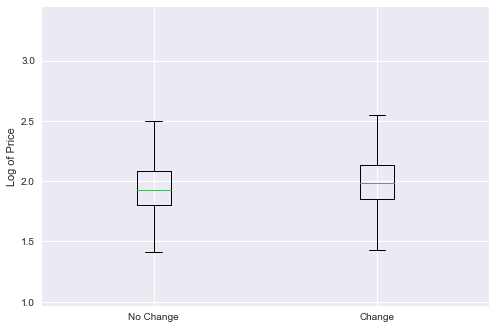

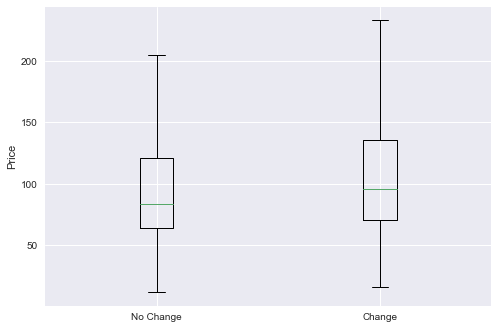

In [38]:
plt.boxplot([no_change.log_price, change.log_price])
plt.xticks([1, 2], ['No Change', 'Change'])
plt.ylabel('Log of Price')
plt.show()

plt.boxplot([no_change.price_final, change.price_final], showfliers=False)
plt.xticks([1, 2], ['No Change', 'Change'])
plt.ylabel('Price')
plt.show()

In [43]:
# create linear model
X_change = change[['room_type', 'accommodates', 'bedrooms', 'arrondissement', 'reviews1']]
X_change = pd.get_dummies(X_change, columns = ['room_type', 'arrondissement'])
X_change = X_change.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)

X_change= sm.add_constant(X_change)

y_change = change['log_price']

y_change = change['log_price']

lm_change = sm.OLS(y_change, X_change).fit()
print(lm_change.summary())



                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     528.7
Date:                Wed, 21 Mar 2018   Prob (F-statistic):               0.00
Time:                        21:25:34   Log-Likelihood:                 3790.6
No. Observations:                7709   AIC:                            -7531.
Df Residuals:                    7684   BIC:                            -7357.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [46]:
X_nochange = no_change[['room_type', 'accommodates', 'bedrooms', 'arrondissement', 'reviews1']]
X_nochange = pd.get_dummies(X_nochange, columns = ['room_type', 'arrondissement'])
X_nochange = X_nochange.drop(['arrondissement_20', 'room_type_Entire home/apt'], axis=1)
X_nochange = sm.add_constant(X_nochange)

y_nochange = no_change['log_price']

lm_nochange = sm.OLS(y_nochange, X_nochange).fit()
print(lm_nochange.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     88.50
Date:                Wed, 21 Mar 2018   Prob (F-statistic):          1.37e-282
Time:                        21:26:17   Log-Likelihood:                 827.75
No. Observations:                1810   AIC:                            -1605.
Df Residuals:                    1785   BIC:                            -1468.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1

In [41]:
# naive bayes 


timeframe4['change'] = np.nan
timeframe4.loc[timeframe4['review_change'] >=1, 'change'] =int(1)
timeframe4.loc[timeframe4['review_change'] ==0, 'change'] =int(0)

X_nb = timeframe4[['accommodates', 'bedrooms', 'log_price', 'reviews1']]
y_nb = timeframe4['change']


from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_nb, y_nb, test_size=0.2)
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

/Users/sarahjordan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sarahjordan/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0.668592436975
[[285 122]
 [509 988]]


In [42]:
print(len(timeframe4[timeframe4['change'] == 1])/len(timeframe4['change']))

0.8098539762580103
